#1.데이터 전처리
1. 데이터 불러오기
2. 결측치 제거
3. 필요 없는 열 제거
4. 단위 맞추기

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기 (in millions)
import io
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf-8')))


Saving vgames2.csv to vgames2 (1).csv


In [ ]:
con123 = (df['Year'] <= 100)
df[con123]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...,...
15985,15986,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,16104,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,16150,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [ ]:
#열 삭제
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
#결측치 확인
df.isnull().sum()
#삭제
df.dropna(axis = 0,inplace=True)
#결측치 확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
A = df.loc[:,:'Publisher']
X = df.loc[:,'NA_Sales':]

#단위'K','M' 제거
X = X.applymap(lambda x : x.replace('M',''))
X = X.applymap(lambda x : x.replace('K','00'))
X = X.applymap(lambda x : float(x))

#년도 처리 #앞 20,19 없애기
A['Year'] = A['Year'].apply(lambda x : str(x).replace('20',''))
A['Year'] = A['Year'].apply(lambda x : str(x).replace('19',''))
A['Year'] = A['Year'].apply(lambda x : str(int(float(x))))

#19, 20붙이기
A['Year'] = A['Year'].apply(lambda x : '200'+x if 10 > int(x) else x)
A['Year'] = A['Year'].apply(lambda x : '20'+x if 10 <= int(x) <50 else x)
A['Year'] = A['Year'].apply(lambda x : '19'+x if 50 <= int(x) <100 else x)


In [ ]:
#feature별로 나누기
na = X['NA_Sales']
eu = X['EU_Sales']
jp = X['JP_Sales']
oth = X['Other_Sales']

#단위 맞추기
na = na.apply(lambda x : x/100000 if x >= 1000 else x)
eu = eu.apply(lambda x : x/100000 if x >= 1000 else x)
jp = jp.apply(lambda x : x/100000 if x >= 1000 else x)
oth = oth.apply(lambda x : x/100000 if x >= 1000 else x)

#단위 맞춘 후 합치기
X = pd.DataFrame(data = [na,eu,jp,oth])
X = X.T

#데이터 합치기
df = pd.concat([A,X], axis = 1)
df.head(15)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


# **2. 필수 문제**



> 2-1. 지역에 따라서 선호하는 게임 장르가 다를까

>2-2. 연도별 게임의 트렌드가 있을까

>2-3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스









In [ ]:
# 2-1 지역에 따라서 선호하는 게임 장르가 다를까?

#총 출고량 생성
df['Total_Sales'] = df['EU_Sales']+df['JP_Sales']+df['NA_Sales']+df['Other_Sales']
#데이터 셋
f_gen = df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Total_Sales']]

#장르 기준 묶기
gen_sum = f_gen.groupby('Genre').sum()
gen_sum.reset_index(inplace = True)
gen_sum.set_index('Genre', inplace = True)

local = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales','Total_Sales']

loc = []
for x in local:
  y = gen_sum.index[(gen_sum[x] == gen_sum[x].max())].tolist()
  loc.append(y)


gen_sum


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


In [ ]:
fav = pd.DataFrame(data = loc, index = local, columns = ['Favorite_Genre'])
fav
#결과적으로 대부분 같다고 볼 수 있다. 
#일본을 제외한 모두 Action을 선호하는 것을 볼 수 있다.

,Favorite_Genre
NA_Sales,Action
EU_Sales,Action
JP_Sales,Role-Playing
Other_Sales,Action
Total_Sales,Action


In [ ]:
# 2-2 연도별 게임 트렌드

#년도, 장르 크로스탭
Y_g = pd.crosstab(df['Year'],df['Genre'])
Year = Y_g.reset_index()
Year = Year['Year']
Y_g = Y_g.T

Y_g.loc[:,'1996':]

Year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Genre,,,,,,,,,,,,,,,,,,,,,,
Action,20,31,44,39,43,66,125,144,125,192,184,210,219,271,226,239,263,148,186,253,118,1
Adventure,17,14,23,19,16,20,41,12,38,42,71,84,166,141,153,107,57,60,75,53,33,0
Fighting,30,28,41,24,29,18,54,44,39,43,55,50,57,53,40,49,29,20,23,21,14,0
Misc,23,12,21,25,20,26,45,53,67,110,109,150,210,207,200,183,38,42,41,39,18,0
Platform,14,18,25,18,24,43,77,87,66,82,54,42,62,28,31,37,11,37,10,14,10,0
Puzzle,9,14,13,6,12,15,20,7,25,32,42,65,64,79,45,43,11,3,7,6,0,0
Racing,21,36,48,49,43,71,103,109,70,77,75,84,82,83,57,64,30,16,27,19,20,0
Role-Playing,28,23,26,32,29,41,54,48,60,71,108,103,112,103,103,95,78,70,90,78,40,2
Shooter,23,27,23,16,20,36,78,73,88,96,69,84,83,91,81,94,48,59,47,34,32,0


In [ ]:
#반복 실행문 사용, 가장 많이 발매된 장르 찾기
tr = []
for x in Year:
  y = Y_g.index[(Y_g[x] == Y_g[x].max())].tolist()
  tr.append(y)

#년도 별 트렌드 게임 트렌드
trend = pd.DataFrame(data= tr ,index = Year)
trend

#연도별로 출고량이 많은 장르를 트렌드로 설정하고 진행해본 결과
#매년 마다 트렌드인 장르가 바뀌는 것을 볼 수 있다.
#하지만 많은 연도들은 Action이 트렌드였다는 것을 볼 수 있다.

,0,1,2
Year,,,
1980,Misc,None,None
1981,Action,None,None
1982,Action,None,None
1983,Action,None,None
1984,Puzzle,Racing,Shooter
1985,Platform,Puzzle,None
1986,Action,Platform,None
1987,Sports,None,None
1988,Platform,None,None


In [ ]:
#2-3 출고량이 높은 게임

#총 출고량 생성
df['Total_Sales'] = df['EU_Sales']+df['JP_Sales']+df['NA_Sales']+df['Other_Sales']

#top
top = df[['Name',  'Platform', 'Year', 'Genre', 'Publisher', 'Total_Sales']]
top.set_index('Name')

#순위
top['Rank'] = top['Total_Sales'].rank(method='dense',ascending=False)
top['Rank']= top['Rank'].apply(lambda x : int(x))
con = (top['Rank'] <= 100)
top100 = top[con]
con2 = (top['Rank'] <= 500)
top500 = top[con2]
con3 = (top['Rank'] <= 1000)
top1000 = top[con3]

top

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Name,Platform,Year,Genre,Publisher,Total_Sales,Rank
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,976
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.18,944
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.02,978
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,976
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.25,924
...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.20,939
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,979
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.79,792
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.38,893


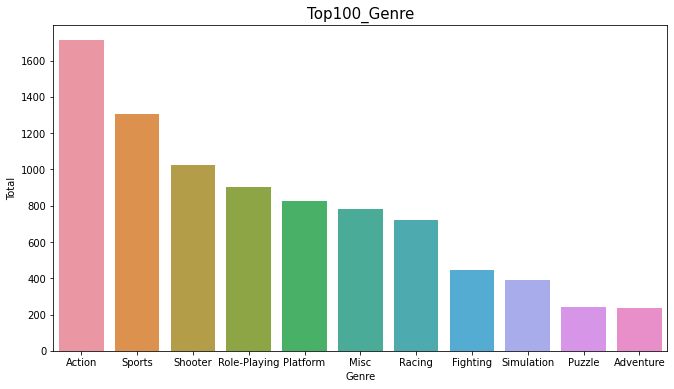

In [ ]:
#시각화 Genre_top100
gen = top100['Genre'].drop_duplicates()

#top100 출고량 비교
total = []
for i in gen:
  con = (top['Genre']== i)
  tot = top[con]['Total_Sales'].sum()
  total.append(tot)

#genre, total 합치기
gen_total = pd.DataFrame(data = total, index= gen, columns = ['Total'])
gen_total = gen_total.reset_index()
gen_total['Rank'] = gen_total['Total'].rank(method='dense',ascending=False)
gen_total = gen_total.sort_values('Rank')

#barplot
plt.figure(figsize=(11,6))
plt.title('Top100_Genre',size = 15)
sns.barplot(data = gen_total,x = 'Genre' , y = 'Total' )

#그래프를 보면 Action, Sports, Shooter 장르가 top3이다.


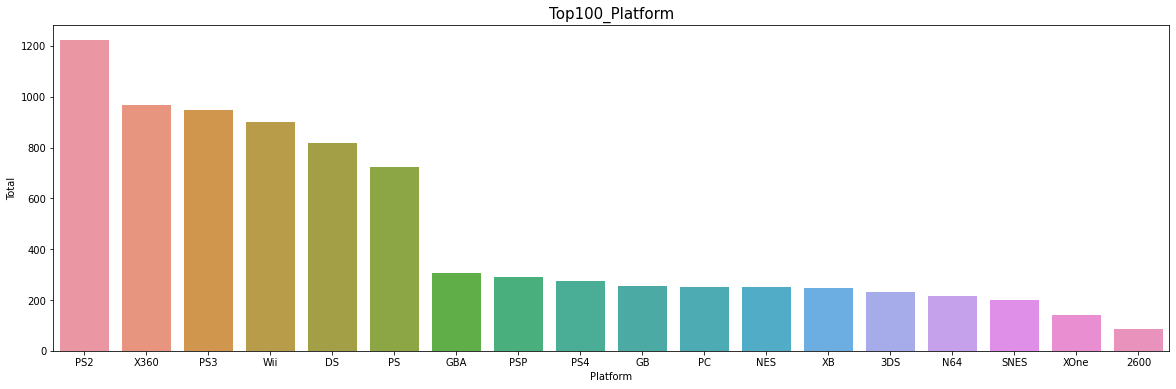

In [ ]:
#시각화 Platform_top100
plat = top100['Platform'].drop_duplicates()

#top100 출고량 비교
P_total = []
for i in plat:
  con = (top['Platform']== i)
  tot = top[con]['Total_Sales'].sum()
  P_total.append(tot)

#genre, total 합치기
plat_total = pd.DataFrame(data = P_total, index= plat, columns = ['Total'])
plat_total = plat_total.reset_index()
plat_total['Rank'] = plat_total['Total'].rank(method='dense',ascending=False)
plat_total = plat_total.sort_values('Rank')

#barplot
plt.figure(figsize=(20,6))
plt.title('Top100_Platform',size = 15)
sns.barplot(data = plat_total,x = 'Platform' , y = 'Total' )


In [ ]:
#시각화 Publisher_top100
pub = top100['Publisher'].drop_duplicates()

#top100 출고량 비교
Pub_total = []
for i in pub:
  con = (top['Publisher']== i)
  tot = top[con]['Total_Sales'].sum()
  Pub_total.append(tot)

#genre, total 합치기
pub_total = pd.DataFrame(data = Pub_total, index= pub, columns = ['Total'])
pub_total = pub_total.reset_index()
pub_total['Rank'] = pub_total['Total'].rank(method='dense',ascending=False)
pub_total = pub_total.sort_values('Rank')

#barplot
plt.figure(figsize=(30,6))
sns.barplot(data = pub_total,x = 'Publisher' , y = 'Total' )


#3.자가 문제
>3-1 자료 기준 최근 3년 우세 장르

>3-2 장르, 플랫폼, 퍼블리셔와 출고량의 관계(카이검정을 통한 증명)

>3-3 다음 분기 게임장르, 플랫폼 선정

In [ ]:
#최근 3년 간 데이터(15~17)
df['Year'] = df['Year'].apply(lambda x : int(x))
condition = (df['Year']>= 2015)
cur = df[condition]

In [ ]:
#15-17 지역 별 선호 장르
cur_gen = cur[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
cur_gen = cur_gen.groupby('Genre').sum()
local1 = cur_gen.T
local1.reset_index(inplace = True)
local1 = local1['index']

loc1 = []
for x in local1:
  y = cur_gen.index[(cur_gen[x] == cur_gen[x].max())].tolist()
  loc1.append(y)


cur4 = pd.DataFrame(data = loc1, index = local1, columns = ['Genre'])
condition1 = (cur['Total_Sales'] >= 1)# & (cur['Total_Sales'] <= 0.1)
cur[condition1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Sales_groups
146,Fallout 4,PC,2015,Role-Playing,Bethesda Softworks,0.50,0.63,0.00,0.10,1.23,3
1490,Mad Max (2015),PS4,2015,Action,Warner Bros. Interactive Entertainment,0.32,0.58,0.04,0.17,1.11,3
2375,Batman: Arkham Knight,PS4,2015,Action,Warner Bros. Interactive Entertainment,1.49,1.58,0.10,0.61,3.78,5
2469,Ratchet & Clank (2016),PS4,2016,Platform,Sony Computer Entertainment,0.32,0.64,0.04,0.18,1.18,3
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,5
...,...,...,...,...,...,...,...,...,...,...,...
16290,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,Namco Bandai Games,0.66,0.47,0.00,0.11,1.24,3
16310,The Elder Scrolls Online,PS4,2015,Role-Playing,Bethesda Softworks,0.66,0.78,0.00,0.28,1.72,4
16337,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53,4
16439,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14,5


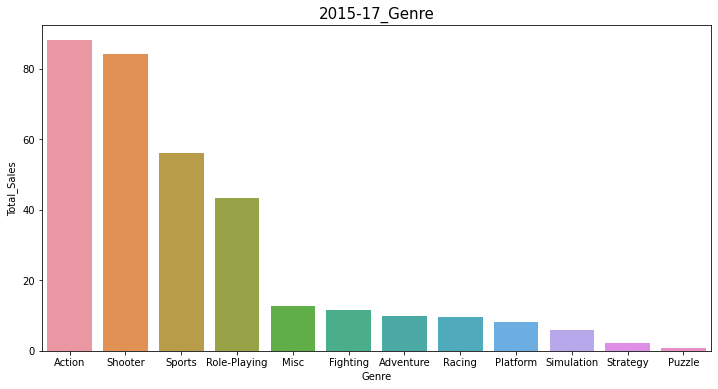

In [ ]:
# 장르별 순위
cur_gen['Rank'] = cur_gen['Total_Sales'].rank(method='dense',ascending=False)
cur_gen['Rank'].apply(lambda x : int(x))
cur_gen_sort = cur_gen.sort_values('Rank')
cur_gen_sort.reset_index(inplace = True)

#시각화
plt.figure(figsize = (12, 6))
plt.title('2015-17_Genre', size = 15)
sns.barplot(data = cur_gen_sort, x = 'Genre', y = 'Total_Sales')

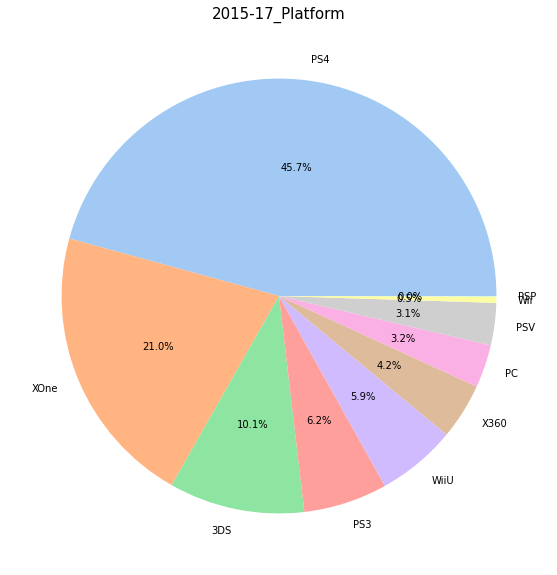

In [ ]:
# 플랫폼 별
cur_plat = cur[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
cur_plat = cur_plat.groupby('Platform').sum()
cur_plat['Rank'] =  cur_plat['Total_Sales'].rank(method='dense',ascending=False)
cur_plat_sort = cur_plat.sort_values('Rank')
cur_plat_sort.reset_index(inplace = True)

#pieplot
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:10]
plt.title('2015-17_Platform', size = 15)
plt.pie(cur_plat_sort['Total_Sales'], labels=cur_plat_sort['Platform'],colors = colors, autopct='%.1f%%')
plt.show()


In [ ]:
# 퍼블리셔 별
cur_pub = cur[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']]
cur_pub = cur_pub.groupby('Publisher').sum()
cur_pub['Sales_groups'] =  np.digitize(cur_pub['Total_Sales'], bins)
cur_pub

#Rank
cur_pub['Rank'] =  cur_pub['Total_Sales'].rank(method='dense',ascending=False)
cur_pub_sort = cur_pub.sort_values('Rank')
cur_pub_sort.reset_index(inplace = True)

#conditioning
con_pub = (cur_pub_sort['Rank']<=10)
cur_con = cur_pub_sort[con_pub]

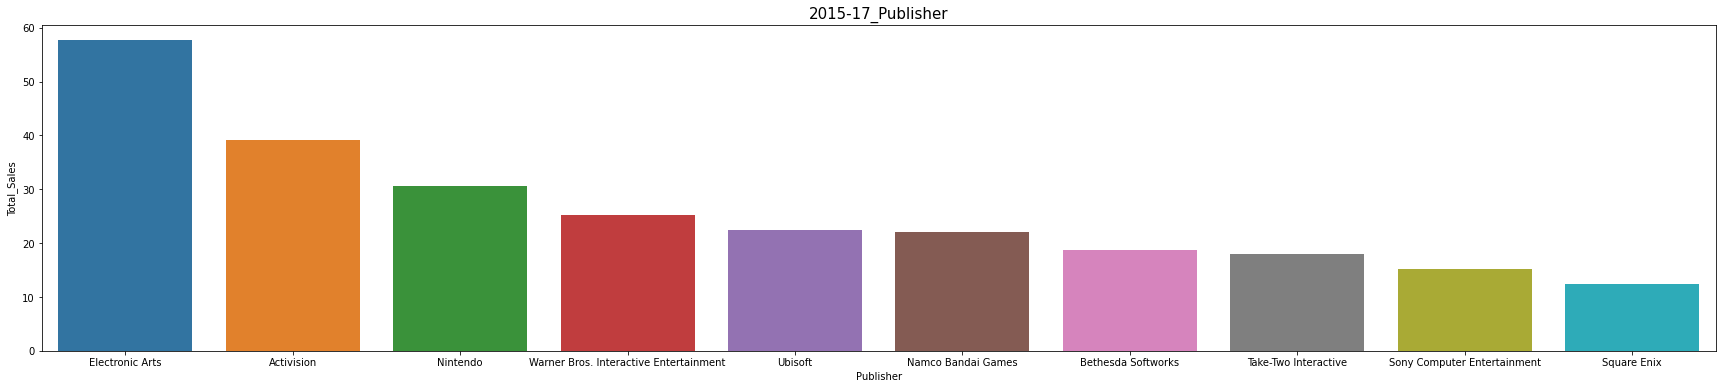

In [ ]:
#시각화
plt.figure(figsize = (30, 6))
plt.title('2015-17_Publisher', size = 15)
sns.barplot(data = cur_con, x = 'Publisher', y = 'Total_Sales')

In [ ]:
#장르, 플랫폼, 퍼블리셔와 출고량의 관계(카이검정을 통한 증명)
from scipy.stats import chi2_contingency

#출고량 범주화
bins = [0, 0.25, 0.5, 0.75, 1]
cur['Sales_groups'] =  np.digitize(cur['Total_Sales'], bins)

#장르_출고량_게임 수
Sale_Genre = pd.crosstab(index = cur['Genre'], columns = cur['Sales_groups'])
Sale_Genre1 = Sale_Genre.copy()
Sale_Genre1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Sales_groups,1,2,3,4,5
Genre,,,,,
Action,295,32,18,10,17
Adventure,77,3,3,1,2
Fighting,21,7,1,2,4
Misc,39,10,4,2,2
Platform,17,3,1,0,3
Puzzle,5,1,0,0,0
Racing,31,3,2,0,3
Role-Playing,88,12,6,4,10
Shooter,27,12,3,3,21


In [ ]:
#chi_square_Test
chi2_contingency(Sale_Genre1)

#가설
#H0 = 장르와 출고량은 연관성 없다.
#H1 = 장르와 출고량은 연관성 있다.

#결과
#p_value = 7.584488514817057e-09
#p_value < 0.05
#H1 = 장르와 출고량은 연관이 있다.

(119.13650413232449,
 7.584488514817057e-09,
 44,
 array([[2.75887029e+02, 3.77447699e+01, 1.71213389e+01, 1.16736402e+01,
         2.95732218e+01],
        [6.37803347e+01, 8.72594142e+00, 3.95815900e+00, 2.69874477e+00,
         6.83682008e+00],
        [2.59571130e+01, 3.55125523e+00, 1.61087866e+00, 1.09832636e+00,
         2.78242678e+00],
        [4.22730126e+01, 5.78347280e+00, 2.62343096e+00, 1.78870293e+00,
         4.53138075e+00],
        [1.77991632e+01, 2.43514644e+00, 1.10460251e+00, 7.53138075e-01,
         1.90794979e+00],
        [4.44979079e+00, 6.08786611e-01, 2.76150628e-01, 1.88284519e-01,
         4.76987448e-01],
        [2.89236402e+01, 3.95711297e+00, 1.79497908e+00, 1.22384937e+00,
         3.10041841e+00],
        [8.89958159e+01, 1.21757322e+01, 5.52301255e+00, 3.76569038e+00,
         9.53974895e+00],
        [4.89476987e+01, 6.69665272e+00, 3.03765690e+00, 2.07112971e+00,
         5.24686192e+00],
        [1.77991632e+01, 2.43514644e+00, 1.10460251e+00, 7.

In [ ]:
#플랫폼_출고량
Sale_Plat = pd.crosstab(index = cur['Platform'], columns = cur['Sales_groups'])
Sale_Plat

Sales_groups,1,2,3,4,5
Platform,,,,,
3DS,95,8,6,4,8
PC,78,5,3,0,2
PS3,80,14,6,3,2
PS4,151,33,13,10,37
PSP,3,0,0,0,0
PSV,168,5,0,0,0
Wii,2,1,0,0,1
WiiU,20,7,4,3,4
X360,31,9,2,4,2


In [ ]:
#chi_square_Test
chi2_contingency(Sale_Plat)

#가설
#H0 = 플랫폼과 출고량은 연관성이 없다.
#H1 = 플랫폼과 출고량은 연관성이 있다.

#결과
#p_value = 8.914028090640772e-13
#p_value < 0.05
#H1 = 플랫폼과 출고량은 연관성이 있다.

(131.34700474648497,
 8.914028090640772e-13,
 36,
 array([[8.97374477e+01, 1.22771967e+01, 5.56903766e+00, 3.79707113e+00,
         9.61924686e+00],
        [6.52635983e+01, 8.92887029e+00, 4.05020921e+00, 2.76150628e+00,
         6.99581590e+00],
        [7.78713389e+01, 1.06537657e+01, 4.83263598e+00, 3.29497908e+00,
         8.34728033e+00],
        [1.80958159e+02, 2.47573222e+01, 1.12301255e+01, 7.65690377e+00,
         1.93974895e+01],
        [2.22489540e+00, 3.04393305e-01, 1.38075314e-01, 9.41422594e-02,
         2.38493724e-01],
        [1.28302301e+02, 1.75533473e+01, 7.96234310e+00, 5.42887029e+00,
         1.37531381e+01],
        [2.96652720e+00, 4.05857741e-01, 1.84100418e-01, 1.25523013e-01,
         3.17991632e-01],
        [2.81820084e+01, 3.85564854e+00, 1.74895397e+00, 1.19246862e+00,
         3.02092050e+00],
        [3.55983264e+01, 4.87029289e+00, 2.20920502e+00, 1.50627615e+00,
         3.81589958e+00],
        [9.78953975e+01, 1.33933054e+01, 6.07531381e+00, 4.

In [ ]:
#퍼블리셔_출고량
Sale_Pub = pd.crosstab(index = cur['Publisher'], columns = cur['Sales_groups'])
Sale_Pub

Sales_groups,1,2,3,4,5
Publisher,,,,,
505 Games,10,1,0,0,0
5pb,11,0,0,0,0
Activision,31,11,2,2,7
Aksys Games,5,0,0,0,0
Alawar Entertainment,1,0,0,0,0
...,...,...,...,...,...
Yacht Club Games,3,0,0,0,0
Yeti,1,0,0,0,0
dramatic create,5,0,0,0,0


In [ ]:
#chi_square_Test
chi2_contingency(Sale_Pub)

#가설
#H0 = 퍼블리셔와 출고량은 연관성이 없다.
#H1 = 퍼블리셔와 출고량은 연관성이 있다.

#결과 
#p_value = 0.0018810065258263997
#p_value < 0.05
#H1 = 퍼블리셔와 출고량은 연관성이 있다.

In [ ]:
cur['Rank'] = cur['Total_Sales'].rank(method='dense',ascending=False)
cur['Rank'].apply(lambda x : int(x))
cur_sort = cur.sort_values('Rank')
cur_sort.head(30)

In [ ]:
#장르별 발매된 게임 수
Sale_Genre['Released_Games'] = Sale_Genre[1]+ Sale_Genre[2]+ Sale_Genre[3]+ Sale_Genre[4]+ Sale_Genre[5]
Sale_Genre

#장르별 등급 합
Sale_Genre_m = cur[['Genre','Sales_groups']]
df1 = Sale_Genre_m.groupby('Genre').sum()

#장르별 발매된 게임 수_ 등급 합
SGM = pd.concat([df1,Sale_Genre['Released_Games']], axis = 1 )
SGM


#판매량 등급 합 / 발매된 게임 수(장르)
SGM.rename(columns = {'Sales_groups':'Tot_Sales_groups'},inplace = True)
SGM['Tot_Sale/Released games'] = SGM['Tot_Sales_groups']/SGM['Released_Games']
SGM['순위'] = SGM['Tot_Sale/Released games'].rank(method='dense',ascending=False)
SGM = SGM.sort_values('순위')
SGM = SGM[['Tot_Sales_groups','Released_Games','Tot_Sale/Released games']]
SGM

,Tot_Sales_groups,Released_Games,Tot_Sale/Released games
Genre,,,
Shooter,177,66,2.681818
Sports,194,100,1.940000
Fighting,66,35,1.885714
Platform,41,24,1.708333
Role-Playing,196,120,1.633333
Misc,89,57,1.561404
Racing,58,39,1.487179
Action,538,372,1.446237
Simulation,33,24,1.375000
